# Table of Contents

- [Preprocessing for Clustering](#preprocessing-for-clustering)
  - [Merging DataFrames](#merging-dataframes)
  - [Feature selection](#feature-selection)
  - [Pairplots, correlation matrix and analysis](#pairplots,-correlation-matrix-and-analysis)
  - [Scaling](#scaling)
- [K-means Clustering](#k-means-clustering)
- [DBSCAN Clustering](#dbscan-clustering)
- [Hierarchical Clustering](#hierarchical-clustering)
- [Cluster Evaluation and Interpretation](#cluster-evaluation-and-interpretation)
- [Final observations](#final-observations)


# Preprocessing for Clustering

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load datasets
cyclists_df = pd.read_pickle('cyclists_transformed.pkl')
races_df = pd.read_pickle('races_transformed.pkl')

# Display info
print("Cyclists DataFrame:")
print(cyclists_df.info())
print("\nRaces DataFrame:")
print(races_df.info())

Cyclists DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _url                6134 non-null   string 
 1   name                6134 non-null   string 
 2   birth_year          6134 non-null   Int64  
 3   weight              6134 non-null   Int64  
 4   height              6134 non-null   Int64  
 5   nationality         6134 non-null   string 
 6   BMI                 3071 non-null   Float64
 7   races_participated  6134 non-null   int64  
dtypes: Float64(1), Int64(3), int64(1), string(3)
memory usage: 407.5 KB
None

Races DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 589704 entries, 0 to 589864
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               589704 non-null  string        
 1   name     

## Merging DataFrames

In [16]:
merged_df = pd.merge(races_df, cyclists_df, left_on='cyclist', right_on='_url')
merged_df.head()

,_url_x,name_x,points,length,climb_total,profile,startlist_quality,position,cyclist,cyclist_age,...,climb_length,length_catogory,_url_y,name_y,birth_year,weight,height,nationality,BMI,races_participated
0,tour-de-france/1978/stage-6,Tour de France,100,162000,1101,1,1241,0,sean-kelly,22,...,short 0-25%,medium 25-50%,sean-kelly,Sean Kelly,1956,77,180,Ireland,23.8,629
1,tour-de-france/1978/stage-6,Tour de France,100,162000,1101,1,1241,1,gerrie-knetemann,27,...,short 0-25%,medium 25-50%,gerrie-knetemann,Gerrie Knetemann,1951,69,181,Netherlands,<NA>,271
2,tour-de-france/1978/stage-6,Tour de France,100,162000,1101,1,1241,2,rene-bittinger,24,...,short 0-25%,medium 25-50%,rene-bittinger,René Bittinger,1954,69,174,France,22.8,146
3,tour-de-france/1978/stage-6,Tour de France,100,162000,1101,1,1241,3,joseph-bruyere,30,...,short 0-25%,medium 25-50%,joseph-bruyere,Joseph Bruyère,1948,71,188,Belgium,<NA>,48
4,tour-de-france/1978/stage-6,Tour de France,100,162000,1101,1,1241,4,sven-ake-nilsson,27,...,short 0-25%,medium 25-50%,sven-ake-nilsson,Sven-Åke Nilsson,1951,63,172,Sweden,21.3,145


In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589704 entries, 0 to 589703
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   _url_x              589704 non-null  string        
 1   name_x              589704 non-null  string        
 2   points              589227 non-null  Int64         
 3   length              589704 non-null  Int64         
 4   climb_total         442692 non-null  Int64         
 5   profile             441607 non-null  Int64         
 6   startlist_quality   589704 non-null  int64         
 7   position            589704 non-null  int64         
 8   cyclist             589704 non-null  string        
 9   cyclist_age         589704 non-null  Int64         
 10  cyclist_team        430630 non-null  string        
 11  delta               589704 non-null  Int64         
 12  year                589704 non-null  int32         
 13  race_day            589704 no

## Feature selection

In [18]:
# Select features from cyclists_df

cyclists_features_list = ['birth_year', 'weight', 'races_participated']
races_features_list = ['climb_total', 'startlist_quality', 'delta']

cyclists_features = cyclists_df[cyclists_features_list]
races_features = races_df[races_features_list]
merged_features = merged_df[cyclists_features_list + races_features_list]

# Drop rows with missing values
cyclists_features = cyclists_features.dropna() # TODO: dovrebbero essere 0. verificare, e poi rimuovere questa riga.
races_features = races_features.dropna()
merged_features = merged_features.dropna()

## Pairplots, correlation matrix and analysis

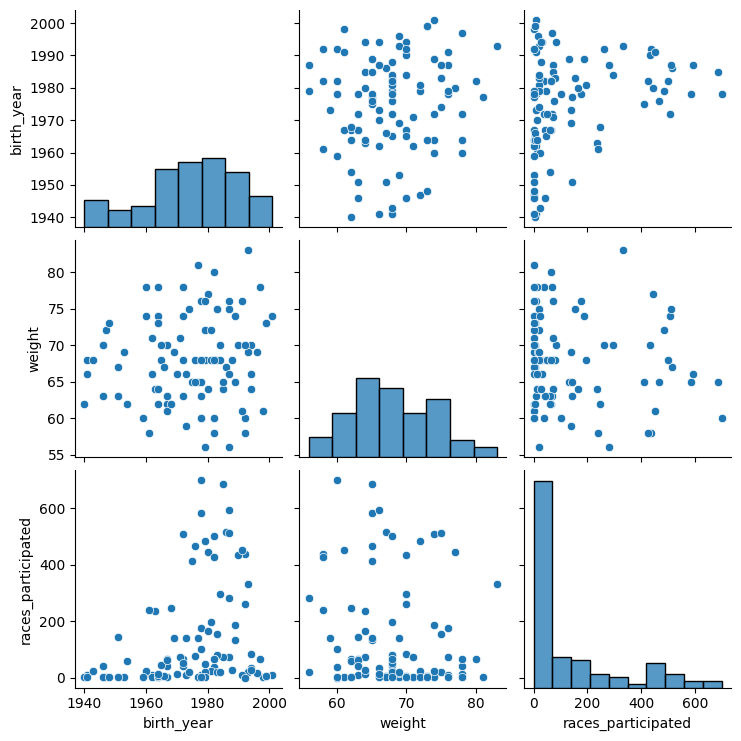

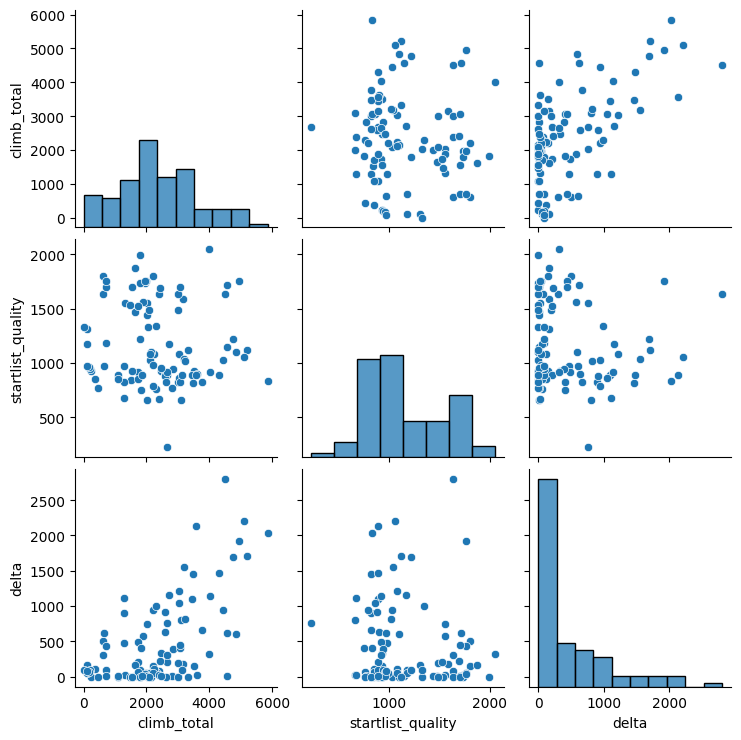

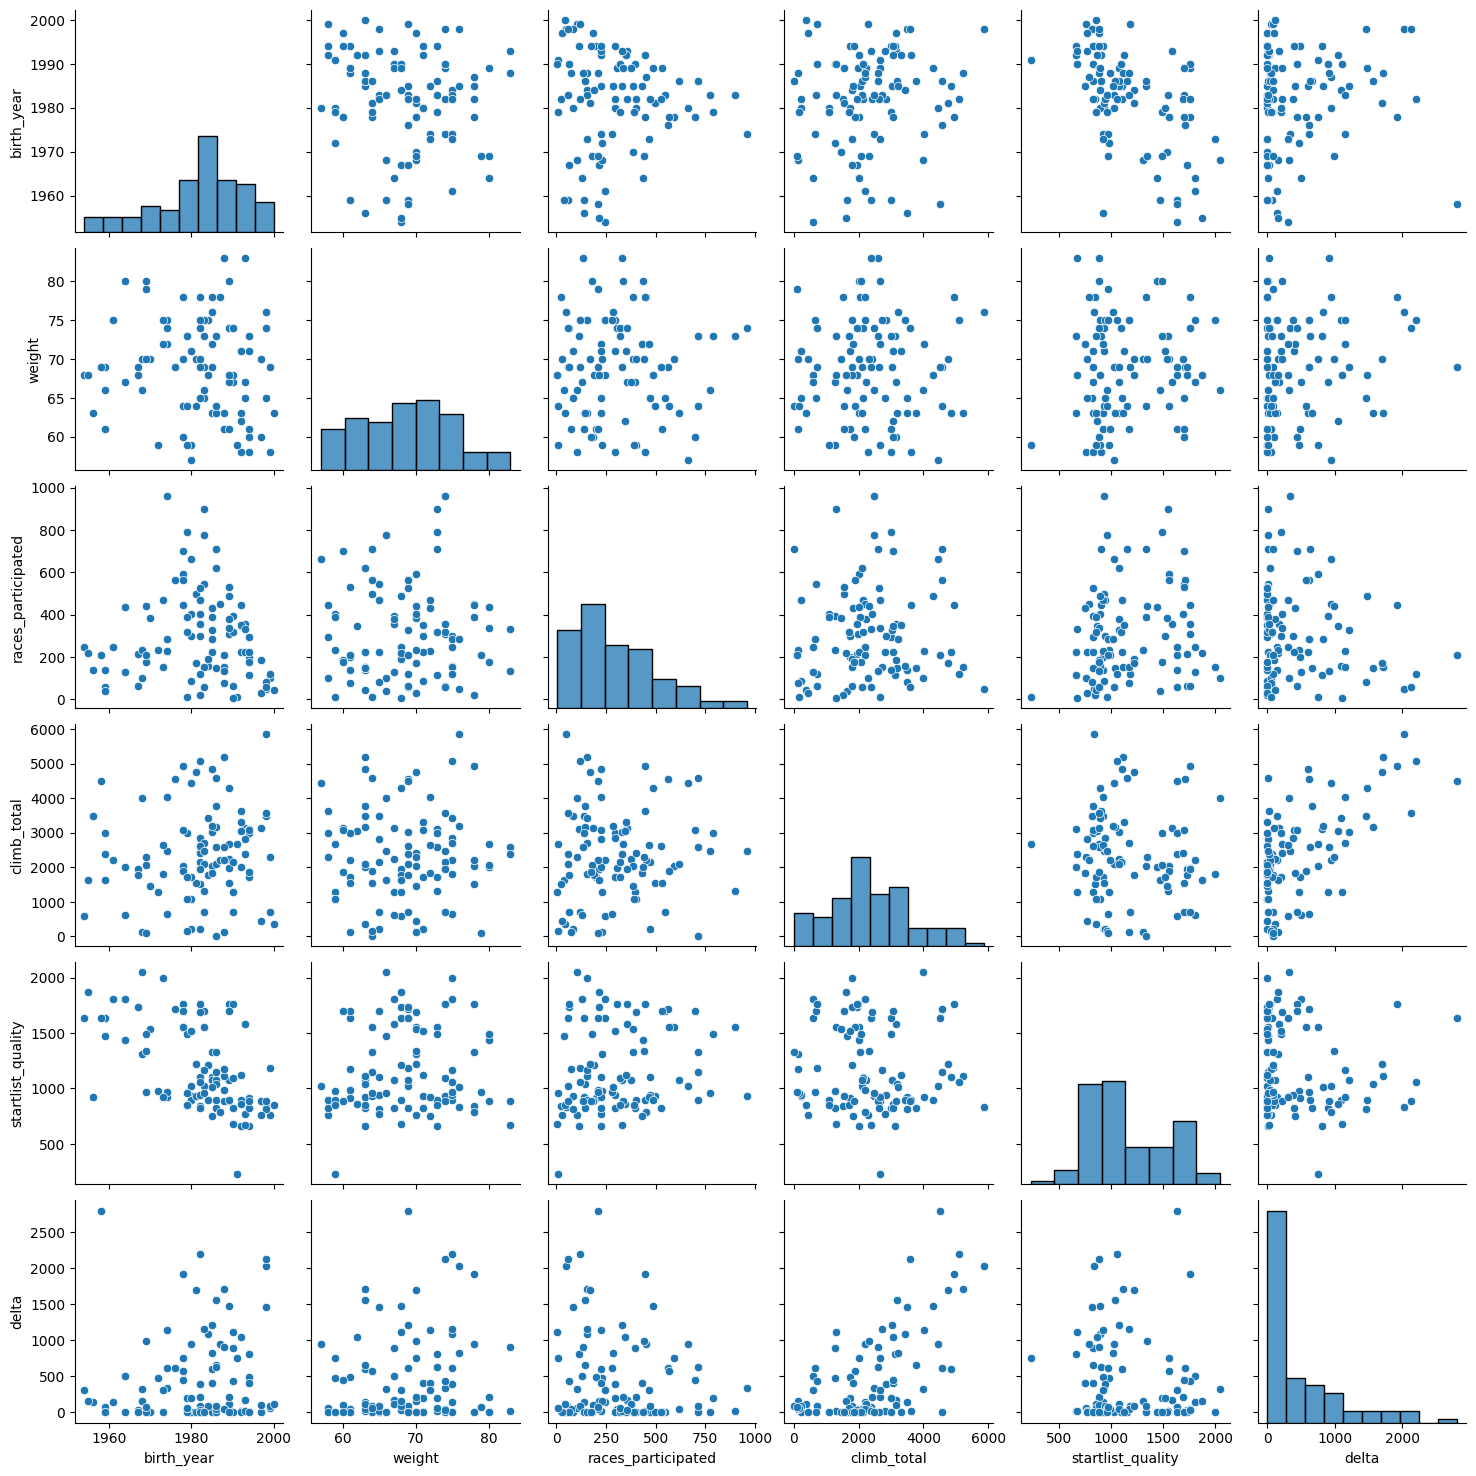

In [19]:
# Sample the datasets
cyclists_sample = cyclists_features.sample(n=100, random_state=42)
races_sample = races_features.sample(n=100, random_state=42)
merged_sample = merged_features.sample(n=100, random_state=42)

# Plot the pairplots
sns.pairplot(cyclists_sample)
sns.pairplot(races_sample)
sns.pairplot(merged_sample)

## Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cyclists_scaled = scaler.fit_transform(cyclists_features)
races_scaled = scaler.fit_transform(races_features)
merged_scaled = scaler.fit_transform(merged_features)

# K-means Clustering


 
We'll use the Elbow Method and Silhouette Score to determine the optimal number of clusters.

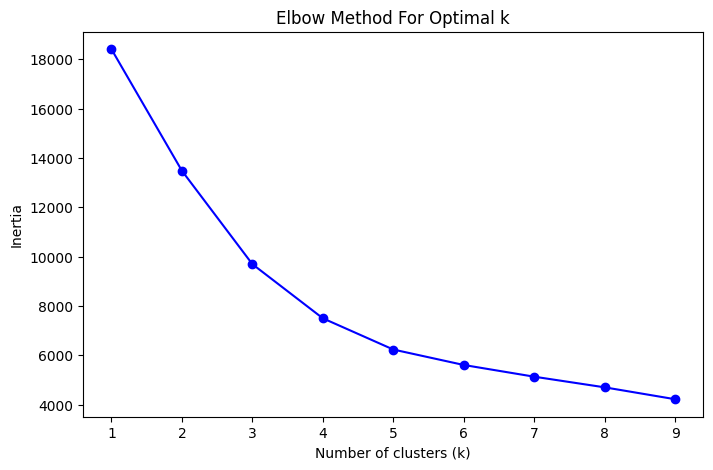

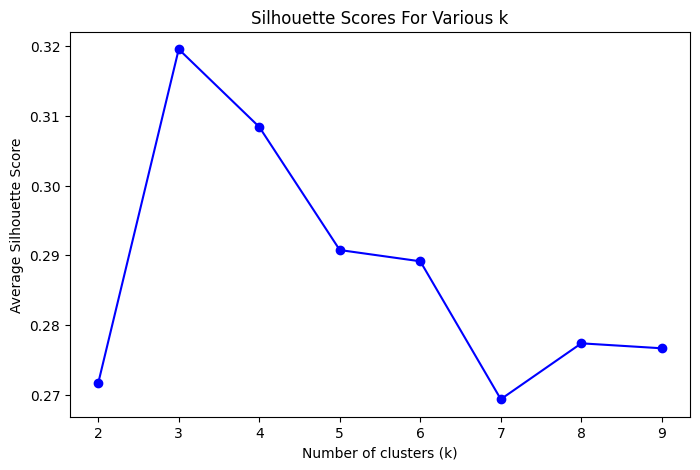

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cyclists_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Scores
silhouette_avg = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(cyclists_scaled)
    silhouette_avg.append(silhouette_score(cyclists_scaled, cluster_labels))

plt.figure(figsize=(8,5))
plt.plot(range(2,10), silhouette_avg, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores For Various k')
plt.show()

Based on these results, we'll choose k = ... TODO: decidere

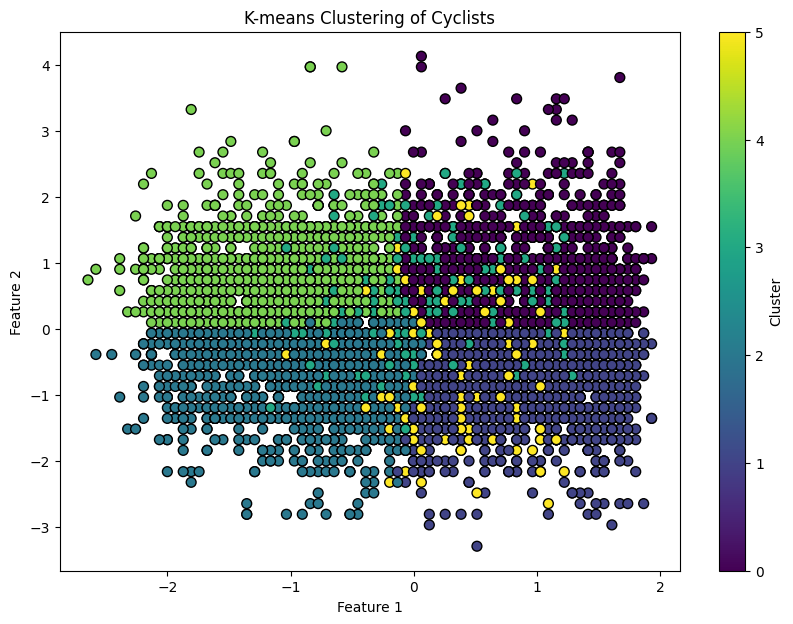

In [22]:
kmeans = KMeans(n_clusters=6, random_state=42)
cyclists_features['kmeans_cluster'] = kmeans.fit_predict(cyclists_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(cyclists_scaled[:, 0], cyclists_scaled[:, 1], c=cyclists_features['kmeans_cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-means Clustering of Cyclists')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# DBSCAN Clustering

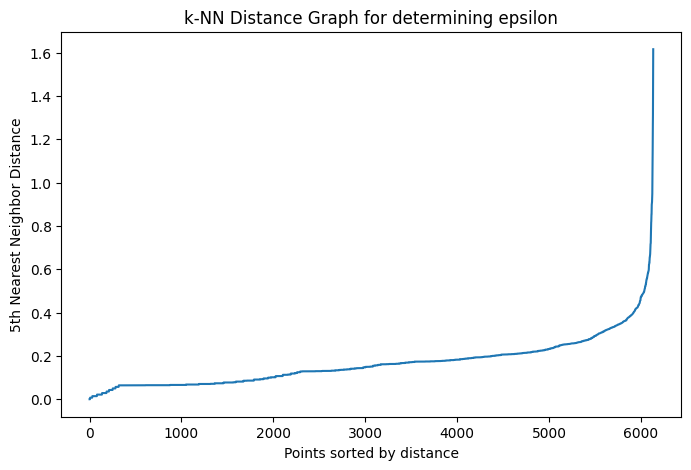

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Determine optimal epsilon using k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(cyclists_scaled)
distances, indices = neighbors_fit.kneighbors(cyclists_scaled)

distances = np.sort(distances[:,4], axis=0)
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('k-NN Distance Graph for determining epsilon')
plt.show()

Based on the k-distance graph, we'll choose `eps = ...`. TODO: decidere e aggiornare sotto

In [24]:
# Perform DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
cyclists_features['dbscan_cluster'] = dbscan.fit_predict(cyclists_scaled)

# Hierarchical Clustering

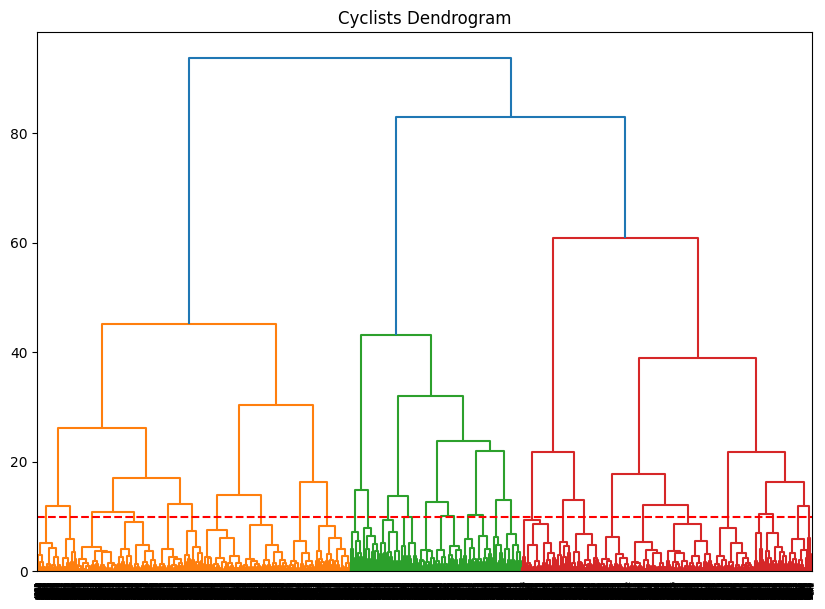

In [25]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Cyclists Dendrogram")
dend = shc.dendrogram(shc.linkage(cyclists_scaled, method='ward'))
plt.axhline(y=10, color='r', linestyle='--') # TODO: scegliere il valore di cutoff
plt.show()

We'll cut the dendrogram at height = ... to get clusters. TODO: decidere e aggiornare TUTTO

In [26]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
cyclists_features['hier_cluster'] = hierarchical.fit_predict(cyclists_scaled)

# Cluster Evaluation and Interpretation

In [27]:
kmeans_clusters = cyclists_features.groupby('kmeans_cluster').mean()
print("KMeans Cluster Profiles:")
print(kmeans_clusters)

KMeans Cluster Profiles:
                 birth_year     weight  races_participated  dbscan_cluster  \
kmeans_cluster                                                               
0               1987.464897  73.943493           46.350171             0.0   
1               1988.047141  63.092736           53.424266             0.0   
2               1960.615115  64.051784           38.643107             0.0   
3               1976.228612  70.001403          266.115007             0.0   
4               1958.269923  73.763496           30.657241             0.0   
5               1980.410468    66.4573          512.008264             0.0   

                hier_cluster  
kmeans_cluster                
0                   0.123288  
1                   0.323029  
2                   1.011197  
3                   1.917251  
4                   0.939160  
5                   2.000000  


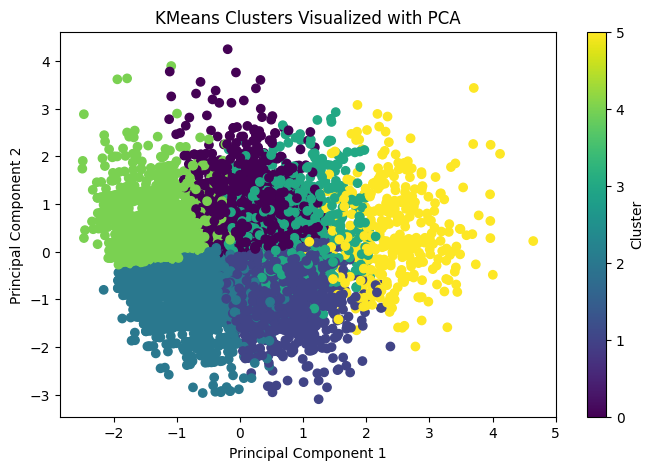

In [28]:
# We'll use PCA to reduce dimensionality for visualization.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
cyclists_pca = pca.fit_transform(cyclists_scaled)

plt.figure(figsize=(8,5))
plt.scatter(cyclists_pca[:,0], cyclists_pca[:,1], c=cyclists_features['kmeans_cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters Visualized with PCA')
plt.colorbar(label='Cluster')
plt.show()

# Final observations